### Importing libraries and Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Language Detection.csv')
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
data['Language'].nunique()

17

So, this dataset contains text details for 17 different languages.

In [5]:
data.shape

(10337, 2)

### Text Preprocessing and Cleaning

In [6]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
sw = set(stopwords.words())

In [8]:
corpus = []

for i in range(data.shape[0]):
    
    text = re.sub(r'[!@#$(),\n"%^*?:;~`0-9]' , ' ' , data['Text'][i])
    text = text.replace('[ ]' , '')
    text = text.lower()
    
    text = ' '.join(word_tokenize(text))

    corpus.append(text)

In [9]:
data['Text'][6]

'[3][4] \nThe concept of nature as a whole, the physical universe, is one of several expansions of the original notion;[1] it began with certain core applications of the word φύσις by pre-Socratic philosophers (though this word had a dynamic dimension then, especially for Heraclitus), and has steadily gained currency ever since.'

In [10]:
corpus[6]

'the concept of nature as a whole the physical universe is one of several expansions of the original notion it began with certain core applications of the word φύσις by pre-socratic philosophers though this word had a dynamic dimension then especially for heraclitus and has steadily gained currency ever since .'

### Label Encoding
- The output variable - the name of languages is a categorical variable. For training the model we need to convert it into a numerical form, so we are performing label encoding on that output variable.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['Language'])

In [12]:
np.unique(y , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([ 536,  428,  546, 1385, 1014,  470,  365,   63,  698,  369,  594,
         739,  692,  819,  676,  469,  474], dtype=int64))

### Bag of Words
- As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 35000)

In [14]:
print(cv.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 35000, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [15]:
X = cv.fit_transform(corpus).toarray()
print(X.shape)

(10337, 35000)


### Train Test Splitting
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(8269, 35000) (2068, 35000) (8269,) (2068,)


### Model Training using Naive Bayes Classifier and Prediction 

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = model.predict(X_test)

### Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [22]:
acc = accuracy_score(y_test , y_pred)
print("The Accuracy is: ", acc*100)

The Accuracy is:  97.92069632495163


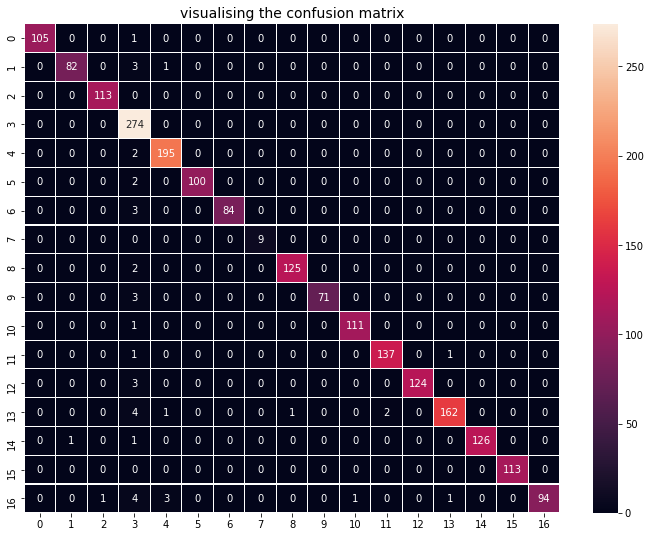

In [23]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot = True , fmt = 'd' , linewidth = 0.1)
plt.title('visualising the confusion matrix' , fontsize = 14)
plt.show()

### Predicting with some more data

In [25]:
def predict(text):
    
    x = cv.transform([text]).toarray()    # converting text to bag of words model (Vector)
    lang = model.predict(x)               # predicting the language
    
    lang = le.inverse_transform(lang)     # finding the language corresponding the the predicted value
    print("The language is:" , lang[0]) 

In [26]:
# English

predict("We are using the Language Detection dataset, which contains text details for 17 different languages.")

The language is: English


In [33]:
# French

predict("fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The language is: French


In [34]:
# Malayalam

predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The language is: Malayalam


In [35]:
# Russian

predict("это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The language is: Russian


In [36]:
# Hindi

predict("यह हिंदी का एक पाठ है जिसका पूर्वानुमान हमारे मॉडल द्वारा लगाया जाएगा")

The language is: Hindi
